In [52]:
#!/usr/bin/env python
"""
Functions used in a machine learning project
implemented at IMT Atlantique.
(Brest ,FRANCE)
"""
__author__ = "OUALI Maher"

#### Imports

In [62]:
from pipeline_perso import CategoricalTransformer, PlotCorrMatrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product
import warnings 
warnings.filterwarnings("ignore")

#### Constants

In [54]:
# constants for styling
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
FIG_SIZE_PLOTS = (11,9)
FIG_SIZE_CORR = (15,13)

#### EDA Banknote Authentication

In [55]:
banknote = pd.read_csv("data_banknote_authentication.txt", header=None)
banknote.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [56]:
features = ['variance', 'skewness', 'curtosis', 'entropy']
banknote[features].describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


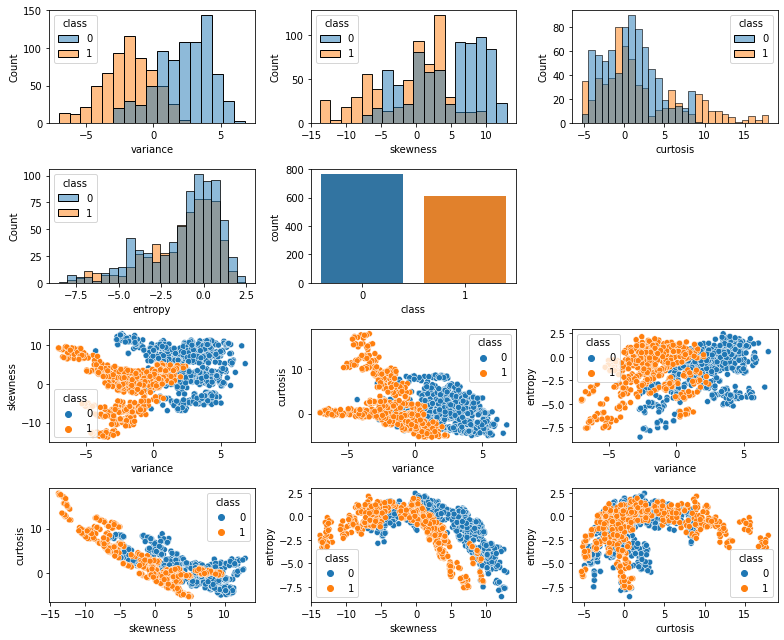

In [57]:
plt.figure(figsize=FIG_SIZE_PLOTS)
counter=0
#plotting histograms 
for i in range(len(banknote.columns)-1):
  counter += 1
  plt.subplot(4,3, counter)
  sns.histplot(x=banknote[banknote.columns[i]], hue=banknote['class'])
counter += 1
plt.subplot(4,3, counter)
counter +=1
sns.countplot(x=banknote['class'])
#plotting 2D scatters between different couples of features 
for i in range(len(banknote.columns)-1):
  for j in range(i+1, len(banknote.columns)-1):
    counter += 1
    plt.subplot(4,3, counter)
    sns.scatterplot(x=banknote[banknote.columns[i]], y=banknote[banknote.columns[j]], hue=banknote['class'])
plt.tight_layout()

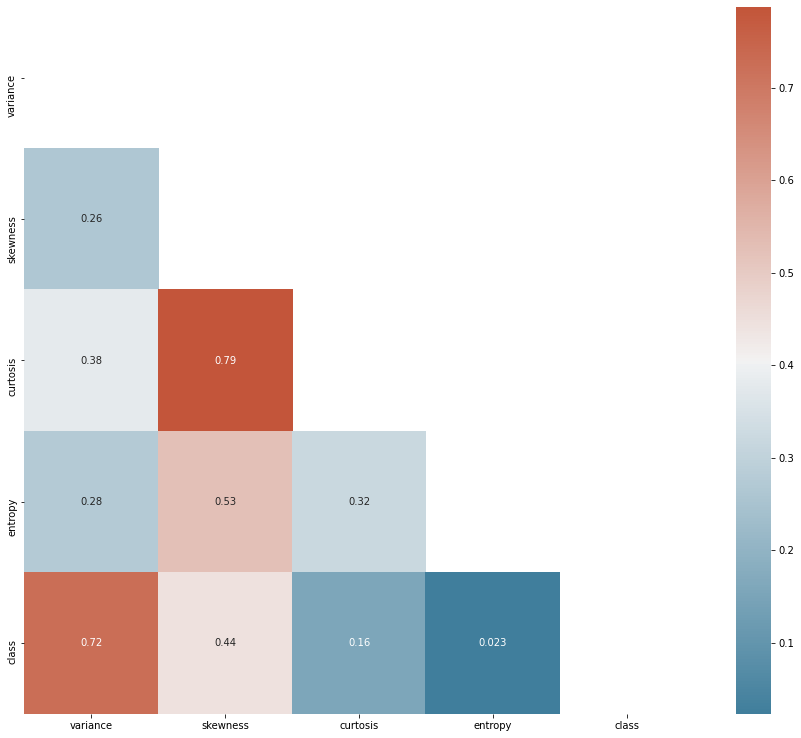

In [64]:
PlotCorrMatrix(banknote, FIG_SIZE_CORR)

#### EDA Chronic Kidney Disease

##### Raw data

In [88]:
print("{}{}First 5 rows in raw chronic kidney disease dataset showing {}missing values".format(color.BOLD, color.BLUE, color.RED))
column_types = {'age':'Numerical', 'bp' :'Numerical', 'sg':'Numerical', 'al':'Numerical', 'su' :'Numerical',
                'rbc':'Categorical', 'pc':'Categorical', 'pcc' :'Categorical', 'ba'  : 'Categorical',
                'bgr' :'Numerical', 'bu' :'Numerical', 'sc' :'Numerical', 'sod' :'Numerical', 'pot' :'Numerical',
                'hemo' :'Numerical', 'pcv' :'Numerical', 'wc' :'Numerical', 'rc' :'Numerical', 'htn' :'Categorical',
                'dm' :'Categorical', 'cad' :'Categorical', 'appet' :'Categorical', 'pe' :'Categorical',
                'ane' :'Categorical', 'classification': 'Categorical'}

kidney = pd.read_csv("kidney_disease.csv", index_col="id").infer_objects()
kidney.head()

First 5 rows in raw chronic kidney disease dataset showing missing values


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [76]:
#function to describe data (missing values percentage etc)
def count_typos(serie, list_typos=["\t", "\n", "?", " "]):
  return sum([any(t in str(s) for t in list_typos) for s in serie])

def describe_dataframe(df, column_types= column_types):
  report = df.isna().sum(axis=0).to_frame().T
  report.index = ["Number of NaNs"]
  typos=[]
  for c in df.columns:
    if(df.dtypes[c] == "object"):
      typos.append(count_typos(df[c].values))
    else:
      typos.append(0)
  report.loc["Number of TYPOs"] = typos
  return report

In [87]:
print("{}{} The number of anomalies in data out of 400 rows".format(color.BOLD, color.BLUE))
describe_dataframe(kidney)

 The number of anomalies in data out of 400 rows


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
Number of NaNs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Number of TYPOs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Clean Data and calculate correlation matrix

In [78]:
#functions to clean data
def remove_typos(x, list_typos=["\t", "\n", "?", " "]):
  for t in list_typos:
    if(t in x):
      x = x.replace(t, "")
  return x

def convert_float(x):
  try:
    return float(x)
  except:
    return np.nan

def clean_dataframe(df, column_types=column_types):
  for c in df.columns:
    if(df.dtypes[c] == "float64"):
      if(column_types[c] == "Categorical"):
        df[c] = df[c].apply(lambda x:str(x))
      else:
        #fill nan with mean
        df.loc[df[c].isna(), c] = df[df[c].isna()][c].fillna(df[~(df[c].isna())][c].mean()).values
    else:
      #remove typos 
      df[c] = df[c].apply(lambda x:remove_typos(x) if(pd.isna(x)==False) else x)
      if(column_types[c] == "Categorical"):
        #fill nan with most frequent value
        df.loc[df[c].isna(), c] = df[df[c].isna()][c].fillna(df[~(df[c].isna())][c].mode()[0]).values
      else:
        #transform data to float
        df[c] = df[c].apply(lambda x:convert_float(x))
        #fill nan with mean
        df.loc[df[c].isna(), c] = df[df[c].isna()][c].fillna(df[~(df[c].isna())][c].mean()).values

In [89]:
print("{}{}First 5 rows in preprocessed chronic kidney disease dataset after removal of all kinds of {}anomalies".format(color.BOLD, color.BLUE, color.RED))
clean_dataframe(kidney)
kidney = kidney.infer_objects()
kidney.head()

First 5 rows in preprocessed chronic kidney disease dataset after removal of all kinds of anomalies


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [90]:
print("{}{}First 5 rows in preprocessed chronic kidney disease dataset after encoding of categorical data".format(color.BOLD, color.BLUE))
#encode categorical data
categorical_columns = kidney.columns[kidney.dtypes == "object"]
encoder = CategoricalTransformer("ordinal_encoding", categorical_columns)
encoded_kidney = pd.DataFrame(encoder.fit_transform(kidney), columns=kidney.columns)
encoded_kidney.head()

First 5 rows in preprocessed chronic kidney disease dataset after encoding of categorical data


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [81]:
encoded_kidney[[c for c in encoded_kidney.columns if c not in categorical_columns]].describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


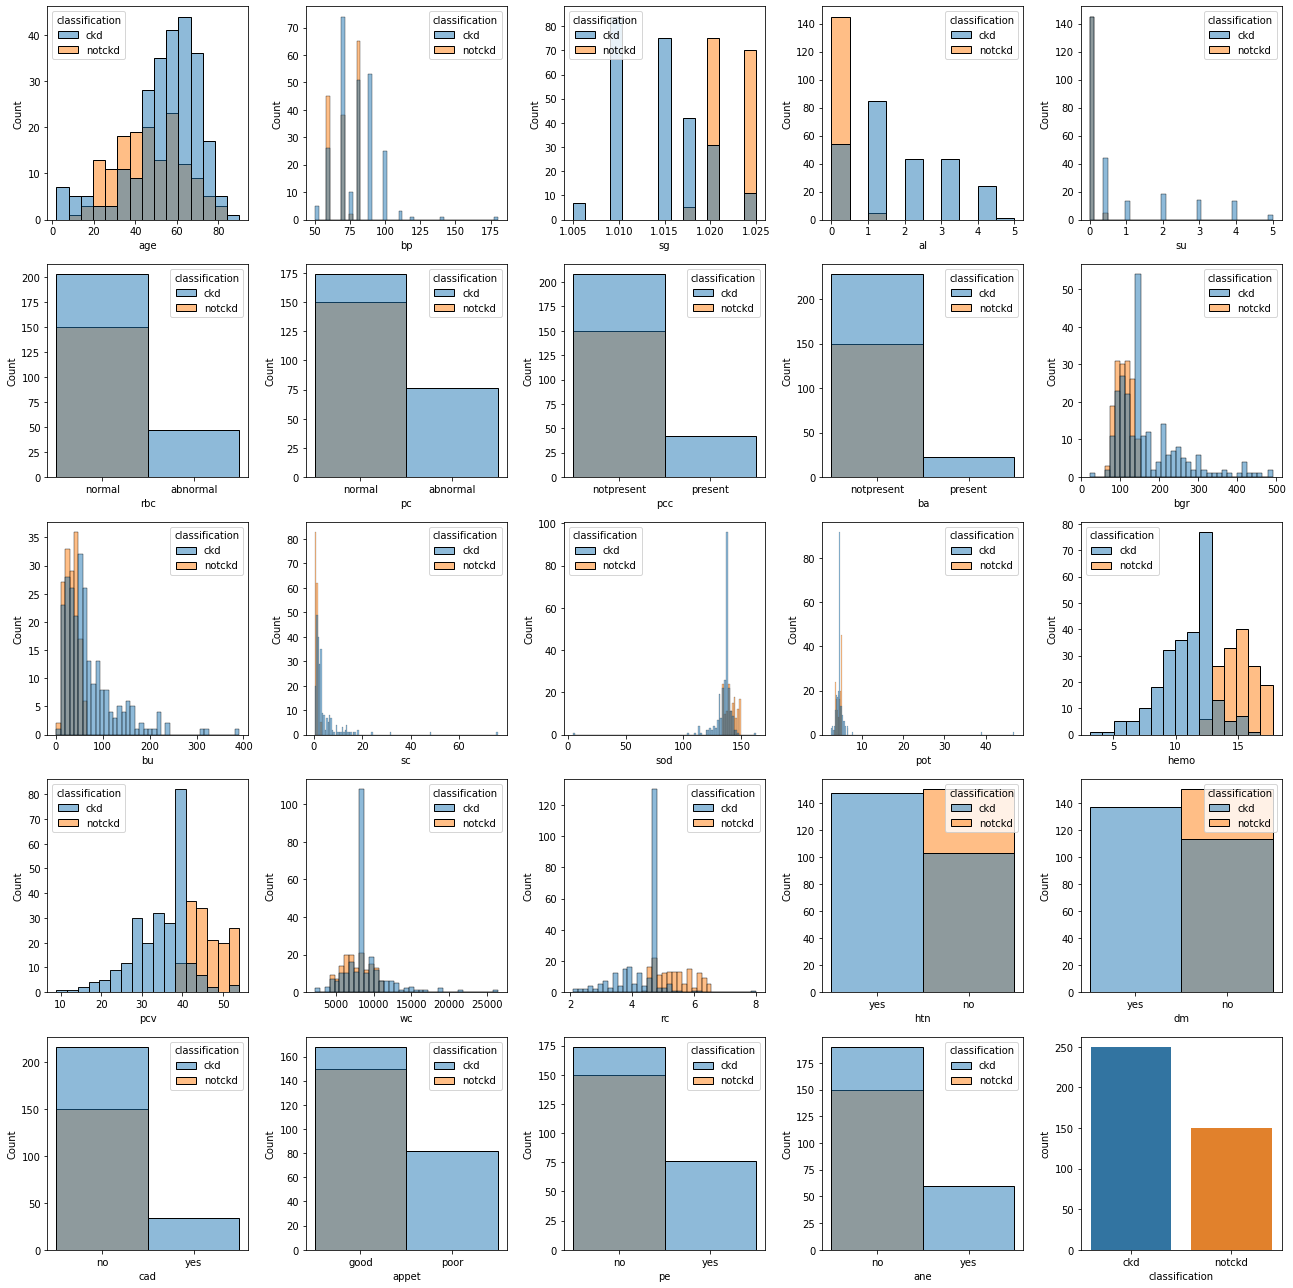

In [86]:
plt.figure(figsize=(18,18))
#plotting histograms and count plots
for i in range(len(kidney.columns)):
  plt.subplot(5,5, i+1)
  if(kidney.columns[i] != 'classification')
    sns.histplot(x=kidney[kidney.columns[i]], hue=kidney['classification'])
  else:
    sns.countplot(x=kidney[kidney.columns[i]])
plt.tight_layout()

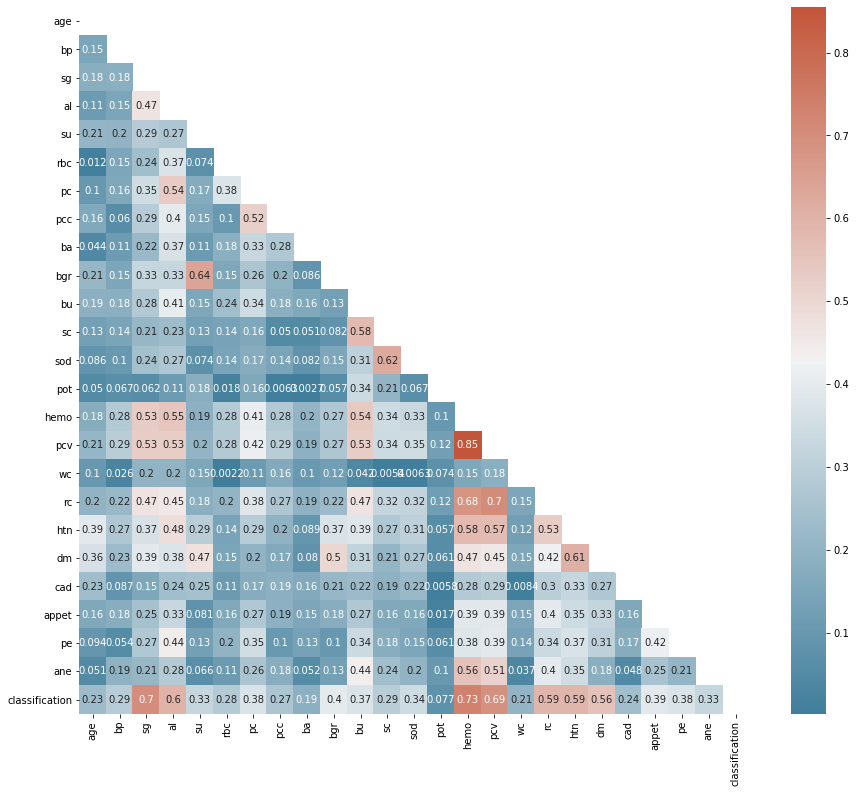

In [82]:
PlotCorrMatrix(encoded_kidney, FIG_SIZE_CORR)
print()